# UnderSampling : 使用 Tomek Link

### <font color=blue>Tomek Link mamual : </font>
https://imbalanced-learn.org/stable/under_sampling.html#tomek-s-links

In [95]:
#! pip install -U scikit-learn
#! pip install -U imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time, math

import sklearn
print(f'scikit-learn version: {sklearn.__version__}')

from sklearn.decomposition import PCA

import imblearn
from imblearn.under_sampling import TomekLinks
print(f'imbalanced-learn version: {imblearn.__version__}')

import warnings
warnings.filterwarnings("ignore")

scikit-learn version: 1.1.0
imbalanced-learn version: 0.9.1


## 匯入資料

In [2]:
#path_ = r'C:\Users\e2414\OneDrive\桌面\專題\AllData\training\final_training' 
path_ = r'E:\專題\AllData\training\final_training' 

path_pca = r'E:\專題\AllData\training\final_training\PCA'

In [3]:
%%time
with open(path_pca+ r"\X_train_total_pc20.pkl", "rb") as f:
    train = pickle.load(f)
    
with open(path_+ r"\y_train.pkl", "rb") as f:
    trainlabel = pickle.load(f)
    
print(train.shape)
print(len(trainlabel))

(745961, 20)
745961
Wall time: 3.66 s


## 原資料各個表情 group 計數

In [4]:
label = list(range(1, 40+1))

In [5]:
%%time
original_group = [trainlabel.count(i) for i in label]
print(original_group)
print(sum(original_group))

[99928, 88854, 64269, 58830, 53435, 39380, 40830, 30052, 29669, 25622, 22693, 22700, 20563, 14118, 16391, 10761, 10528, 10371, 9168, 8691, 8627, 7507, 7211, 5694, 5352, 4513, 3920, 3823, 3560, 3461, 2323, 2281, 2015, 1530, 1447, 1431, 1182, 1238, 1092, 901]
745961
Wall time: 322 ms


Wall time: 495 ms


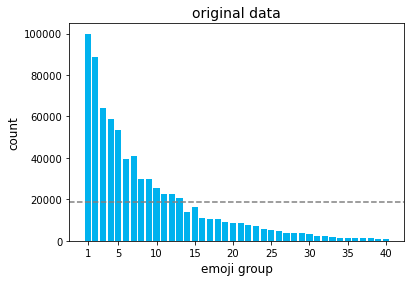

In [23]:
%%time
#fig= plt.figure(figsize= [16, 12])
plt.bar(label, original_group, color = '#00B2EE')
plt.axhline(y=np.mean(original_group), c="gray", ls="--", lw=1.5)
xlabel = [1]+ list(range(5, 40+1, 5))
plt.xticks(xlabel) 
plt.title('original data', size = 14)
plt.xlabel('emoji group', size = 12)
plt.ylabel('count', size = 12)

plt.savefig(path_+ '\original_imbal.jpg')

In [22]:
path_

'E:\\專題\\AllData\\training\\final_training'

In [ ]:
#want = list(original_group > np.mean(original_group))
#change_label = [i+1 for i, v in enumerate(want) if v ==True]
#print(f'針對這幾個 group: {change_label} 處理 imbalance')

## 使用 Tomek Link 
有兩種 approach 可能適合我們 (還有其他種，不放ㄌ):
- resample all classes but the minority class 除了最少類樣本外全部 resample : `TomekLinks('auto')`
- 自己定義要 resample 哪些 class : `TomekLinks([class])`

**我們使用 「除了最少類樣本外全部 resample」**

In [7]:
%%time
# 自己定義要 resample 哪些 class
#X_res, y_res =TomekLinks(change_label).fit_resample(train, trainlabel)
# 1h 53min 31s

# 對最小類的以外都做 Tomek Link 比較適合啦
# 6:00 開始跑
X_res, y_res =TomekLinks('auto').fit_resample(train, trainlabel)
#Wall time: 1h 44min 59s

Wall time: 15min 25s


In [10]:
print(X_res.shape)
print(len(y_res))

(671842, 20)
671842


### 匯出檔案

In [11]:
%%time
with open(path_+ '/tomek_train_pc20.pkl','wb') as f:
    pickle.dump(X_res, f)

with open(path_+ '/tomek_trainlabel_pc20.pkl','wb') as f:
    pickle.dump(y_res, f)

Wall time: 8.42 s


### 每個表情 group 各有幾個

In [13]:
%%time
tomek_group = [y_res.count(i) for i in label]
print(tomek_group)
print(sum(tomek_group))

[92220, 77783, 59432, 50541, 52239, 34204, 38119, 27194, 25983, 24443, 20606, 20987, 18831, 12406, 14181, 9235, 9350, 9662, 7846, 7177, 7189, 6263, 6151, 4870, 4422, 3769, 3377, 3222, 3096, 3153, 2166, 1975, 1774, 1393, 1342, 1221, 1046, 1106, 967, 901]
671842
Wall time: 280 ms


In [14]:
745961 - 671842

74119

## 舊的
### 1. 對 mean 以上的 group 都做 tomek (前 13 個 group)

    [104113, 89587, 67211, 58707, 58258, 39529, 43140, 30902, 29995, 27503, 23541, 23846, 21360, 15690, 18208, 11954, 11640, 11550, 10233, 9679, 9556, 8383, 8010, 6336, 5947, 5027, 4405, 4253, 3958, 3830, 2582, 2523, 2235, 1701, 1586, 1596, 1310, 1358, 1223, 1000]
    共留下 783465 筆資料，刪除 45380 筆資料，檔案存為 tomek_train_mean.pkl、tomek_trainlabel_mean.pkl  
    
    
### 2. 對最小類的以外都做 Tomek
    [104113, 89587, 67211, 58707, 58258, 39529, 43140, 30902, 29995, 27503, 23541, 23846, 21360, 14193, 16383, 10691, 10652, 10946, 9156, 8636, 8430, 7448, 7179, 5664, 5255, 4482, 3988, 3805, 3608, 3580, 2463, 2293, 2037, 1604, 1505, 1423, 1228, 1234, 1120, 1000]
    共留下 767695 筆資料，刪除 61150 筆資料，檔案存為 tomek_train.pkl、tomek_trainlabel.pkl
    
### 原資料    
    [111024, 98498, 71454, 65363, 59303, 43796, 45412, 33392, 32921, 28534, 25224, 25287, 22864, 15690, 18208, 11954, 11640, 11550, 10233, 9679, 9556, 8383, 8010, 6336, 5947, 5027, 4405, 4253, 3958, 3830, 2582, 2523, 2235, 1701, 1586, 1596, 1310, 1358, 1223, 1000]
    共 828845 筆資料


## Tomek Link 後的 group 分佈

Wall time: 114 ms


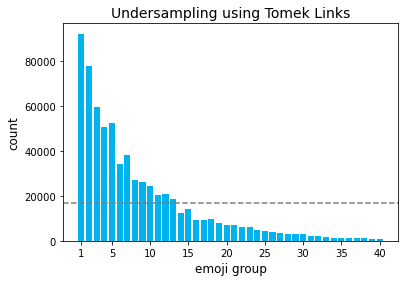

In [27]:
%%time
#fig= plt.figure(figsize= [16, 12])
plt.bar(label, tomek_group, color = '#00B2EE')
plt.axhline(y=np.mean(tomek_group), c="gray", ls="--", lw=1.5)
xlabel = [1]+ list(range(5, 40+1, 5))
plt.xticks(xlabel) 

plt.title('Undersampling using Tomek Links', size = 14)
plt.xlabel('emoji group', size = 12)
plt.ylabel('count', size = 12)

plt.savefig(path_+ 'original_imbal.jpg')

## tomek link 刪去的樣本數

In [17]:
after = tomek_group
before = original_group

diff = [before[i]-after[i] for i in list(range(40))]
print(diff)
sum(diff)

[7708, 11071, 4837, 8289, 1196, 5176, 2711, 2858, 3686, 1179, 2087, 1713, 1732, 1712, 2210, 1526, 1178, 709, 1322, 1514, 1438, 1244, 1060, 824, 930, 744, 543, 601, 464, 308, 157, 306, 241, 137, 105, 210, 136, 132, 125, 0]


74119

## QQ

<hr>

In [183]:
%%time
pca_train = PCA(n_components=2).fit_transform(X_res)
np.shape(pca_train)

Wall time: 34.6 s


(767695, 2)

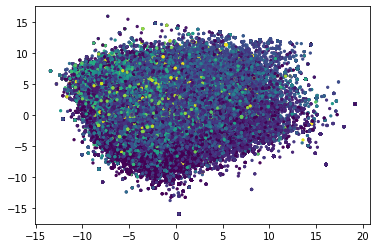

In [191]:
# 40 類 和樣本數 好像都太多ㄌ 呵呵
plt.scatter(pca_train[:, 0] , pca_train[:, 1], c = y_res, s= 5)

## 用 tomek link 後還是非常 imbalance，後續動作 ??
1. tomek link 已把交界模糊帶的大樣本刪掉了，接下來不管 imbalnace ，通通丟進分類模型
2. 變成完全 balance -> 每個樣本只抽 1000 個 (因為最少類是 1000 個)，total 40000 筆資料進分類模型
3. 再做 smote，把少樣本變多
4. 不要那麼 imimimimimbalance，把很多很多的 group 再抽樣取少一點 

混和上面的方法?